### Analysis of Singapore Resale HDB Flat Price from 2012-2022

This is a self initiated exploratory data analysis for Singapore resale HDB flat price from 2012-2022 with Kaggle dataset.

Dataset Source: https://www.kaggle.com/datasets/syrahmadi/resale-hdb-flat-prices-2000-2022/

The following was done in this mini-project
1. Import datasets and merge

2. Data preprocessing and cleaning

3. Data visualization of all datasets.

4. Geospatial visualization for HDB with resale price more than 1million.

In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import and show first five rows of each dataset to understand more about the dataset.

In [486]:
df_00to12 = pd.read_csv('./data/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df_12to14 = pd.read_csv('./data/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df_15to16 = pd.read_csv('./data/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df_17onwards = pd.read_csv('./data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [487]:
df_00to12.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [488]:
df_12to14.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [489]:
df_15to16.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [490]:
df_17onwards.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


Noticed that dataset from 2015 onwards had an extra columns for remaining lease which we need to deal with it later on. 
Also notice there is a different way of recording remaining lease for 2015-2016 datasets comapre with 2017 onwards dataset

## Merge all datasets

In [491]:
df = pd.concat([df_00to12, df_12to14, df_15to16, df_17onwards], axis=0, ignore_index=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584471 entries, 0 to 584470
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                584471 non-null  object 
 1   town                 584471 non-null  object 
 2   flat_type            584471 non-null  object 
 3   block                584471 non-null  object 
 4   street_name          584471 non-null  object 
 5   storey_range         584471 non-null  object 
 6   floor_area_sqm       584471 non-null  float64
 7   flat_model           584471 non-null  object 
 8   lease_commence_date  584471 non-null  int64  
 9   resale_price         584471 non-null  float64
 10  remaining_lease      162617 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 49.1+ MB


In [493]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,584471.0,96.840681,25.147566,28.0,74.0,98.0,113.0,297.00
lease_commence_date,584471.0,1989.855974,10.814004,1966.0,1983.0,1988.0,1998.0,2019.00
resale_price,584471.0,346663.792837,152999.172385,28000.0,233000.0,325000.0,430000.0,1388888.88


## Data Preprocessing and Cleaning

Deal with remaining lease column by calculating the difference of transaction year with the remaining lease 

In [494]:
df['transacted_year']  = df['month'].str.slice(start=0, stop=4)
df['transacted_month'] = df['month'].str.slice(start=5)

In [495]:
df.drop(['month'], axis=1, inplace=True)
df[['transacted_month', 'transacted_year']] = df[['transacted_month', 'transacted_year']].astype('int64')

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584471 entries, 0 to 584470
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 584471 non-null  object 
 1   flat_type            584471 non-null  object 
 2   block                584471 non-null  object 
 3   street_name          584471 non-null  object 
 4   storey_range         584471 non-null  object 
 5   floor_area_sqm       584471 non-null  float64
 6   flat_model           584471 non-null  object 
 7   lease_commence_date  584471 non-null  int64  
 8   resale_price         584471 non-null  float64
 9   remaining_lease      162617 non-null  object 
 10  transacted_year      584471 non-null  int64  
 11  transacted_month     584471 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 53.5+ MB


In [498]:
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,transacted_year,transacted_month
0,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN,2000,1
1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN,2000,1
2,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN,2000,1
3,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN,2000,1
4,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN,2000,1


Remaining lease for all HDB can be determine by subtracting 99 from the difference of transacted year and lease commence date

In [499]:
df['remaining_lease'] = 99 - (df['transacted_year'] - df['lease_commence_date'])
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,transacted_year,transacted_month
0,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,85,2000,1
1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,85,2000,1
2,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,75,2000,1
3,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,75,2000,1
4,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,75,2000,1


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584471 entries, 0 to 584470
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 584471 non-null  object 
 1   flat_type            584471 non-null  object 
 2   block                584471 non-null  object 
 3   street_name          584471 non-null  object 
 4   storey_range         584471 non-null  object 
 5   floor_area_sqm       584471 non-null  float64
 6   flat_model           584471 non-null  object 
 7   lease_commence_date  584471 non-null  int64  
 8   resale_price         584471 non-null  float64
 9   remaining_lease      584471 non-null  int64  
 10  transacted_year      584471 non-null  int64  
 11  transacted_month     584471 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 53.5+ MB


In [501]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,584471.0,96.840681,25.147566,28.0,74.0,98.0,113.0,297.00
lease_commence_date,584471.0,1989.855974,10.814004,1966.0,1983.0,1988.0,1998.0,2019.00
resale_price,584471.0,346663.792837,152999.172385,28000.0,233000.0,325000.0,430000.0,1388888.88
remaining_lease,584471.0,79.236700,11.024850,44.0,71.0,80.0,89.0,101.00
transacted_year,584471.0,2009.619275,6.643373,2000.0,2004.0,2009.0,2015.0,2022.00
transacted_month,584471.0,6.541113,3.404473,1.0,4.0,7.0,9.0,12.00


From the table above, there are some transactions that has lease commence date later than transacted year, which might be a special case. 

In [502]:
percentage_special = (len(df[df.lease_commence_date > df.transacted_year]) / len(df)) * 100
print(f'The percentage of transaction with lease commence date later than tranacted year is {percentage_special:.4f} %')

The percentage of transaction with lease commence date later than tranacted year is 0.0026 %


Since only 0.0026% of data has transaction with lease commence date later than tranacted year, we could drop those data.

In [503]:
df.drop(df[df.lease_commence_date > df.transacted_year].index, inplace=True)
df.reset_index(inplace=True, drop=True)

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584456 entries, 0 to 584455
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 584456 non-null  object 
 1   flat_type            584456 non-null  object 
 2   block                584456 non-null  object 
 3   street_name          584456 non-null  object 
 4   storey_range         584456 non-null  object 
 5   floor_area_sqm       584456 non-null  float64
 6   flat_model           584456 non-null  object 
 7   lease_commence_date  584456 non-null  int64  
 8   resale_price         584456 non-null  float64
 9   remaining_lease      584456 non-null  int64  
 10  transacted_year      584456 non-null  int64  
 11  transacted_month     584456 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 53.5+ MB


## Data Visualization

In [505]:
sns.set_theme(style="darkgrid")

#### General plots

Categorical Data

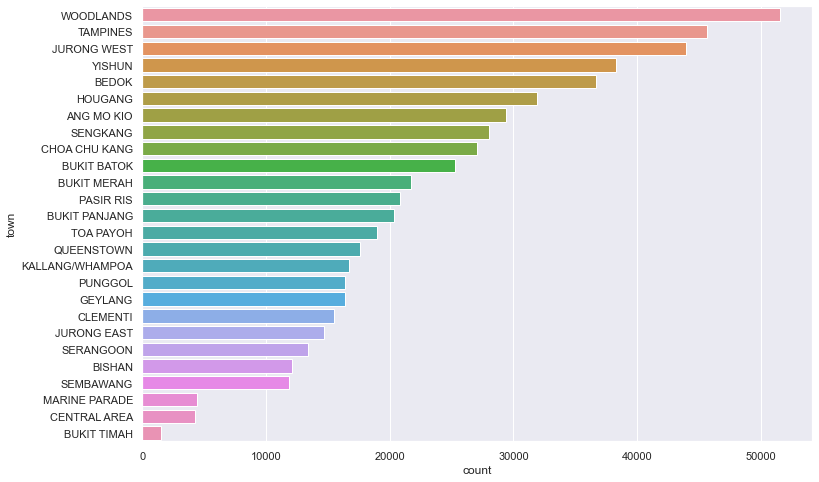

In [506]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=df, y=df.town, order=df.town.value_counts().index)
plt.show()

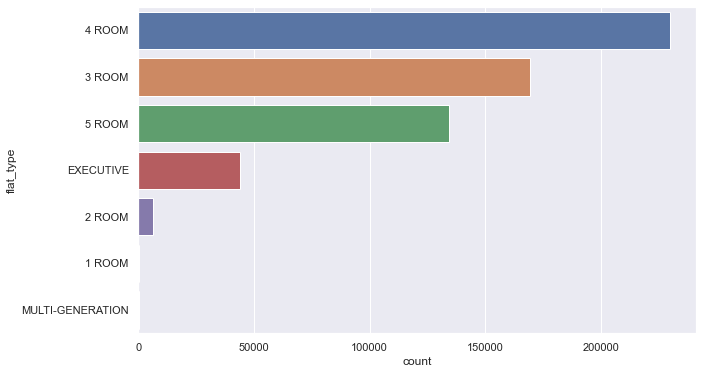

In [507]:
fig = plt.figure(figsize=(10, 6))
sns.countplot(data=df, y=df.flat_type, order=df.flat_type.value_counts().index)
plt.show()

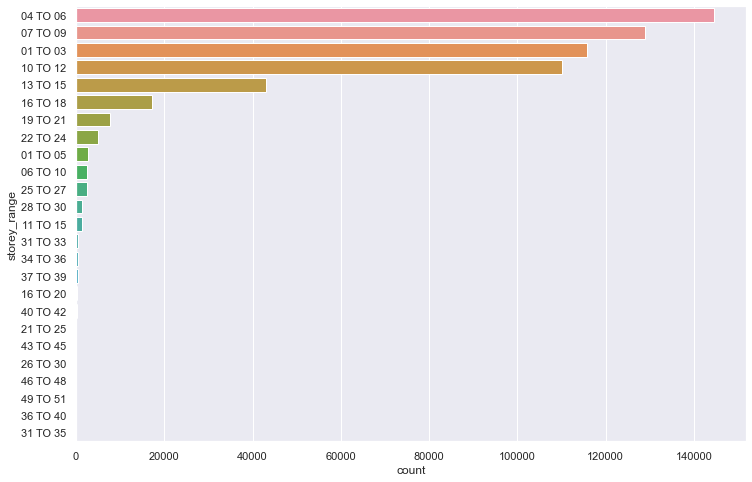

In [508]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=df, y=df.storey_range, order=df.storey_range.value_counts().index)
plt.show()

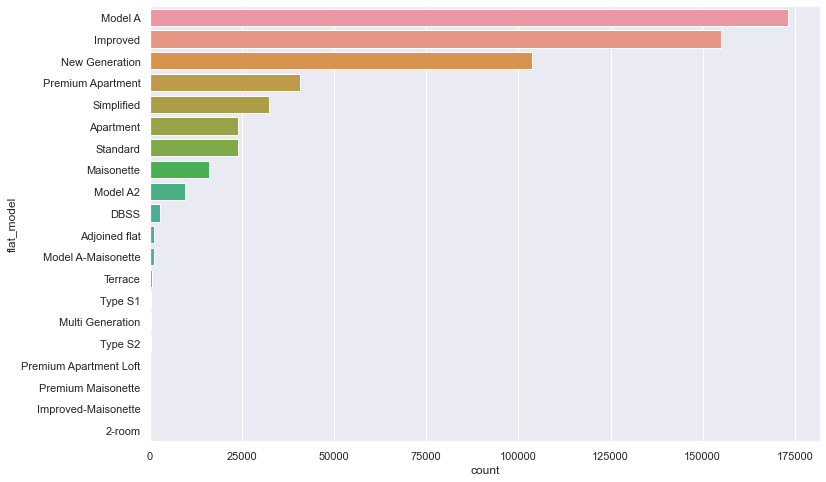

In [509]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=df, y=df.flat_model, order=df.flat_model.value_counts().index)
plt.show()

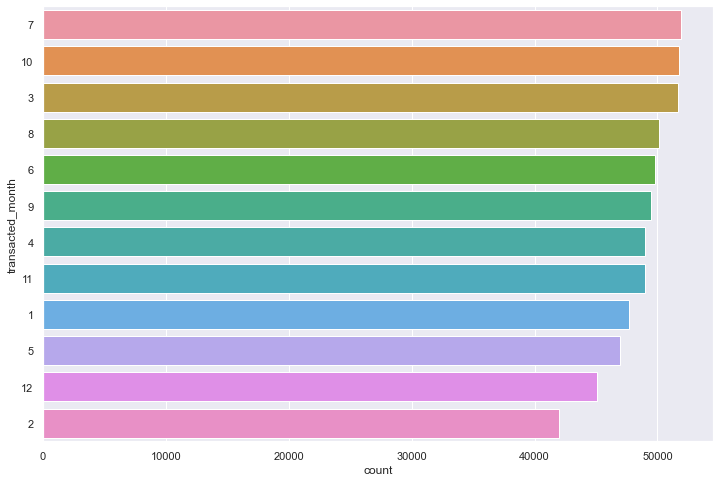

In [510]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=df, y=df.transacted_month, order=df.transacted_month.value_counts().index)
plt.show()

Numerical Data

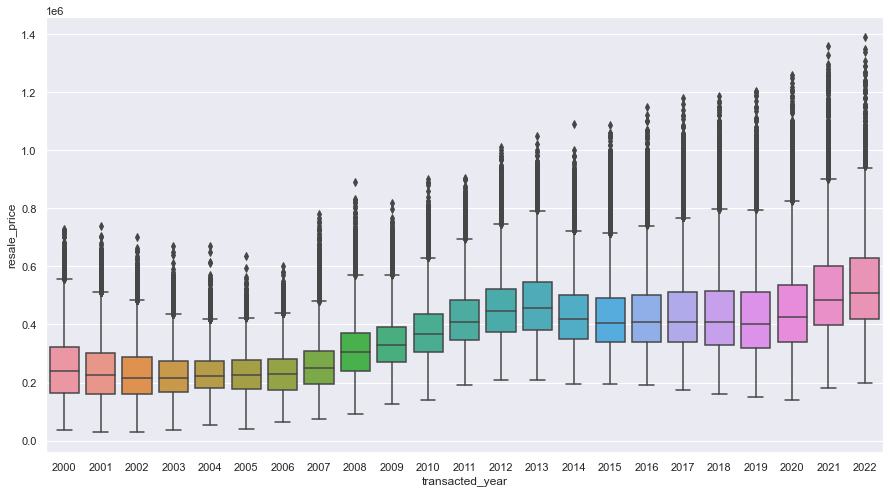

In [511]:
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x=df.transacted_year, y=df.resale_price)
plt.show()

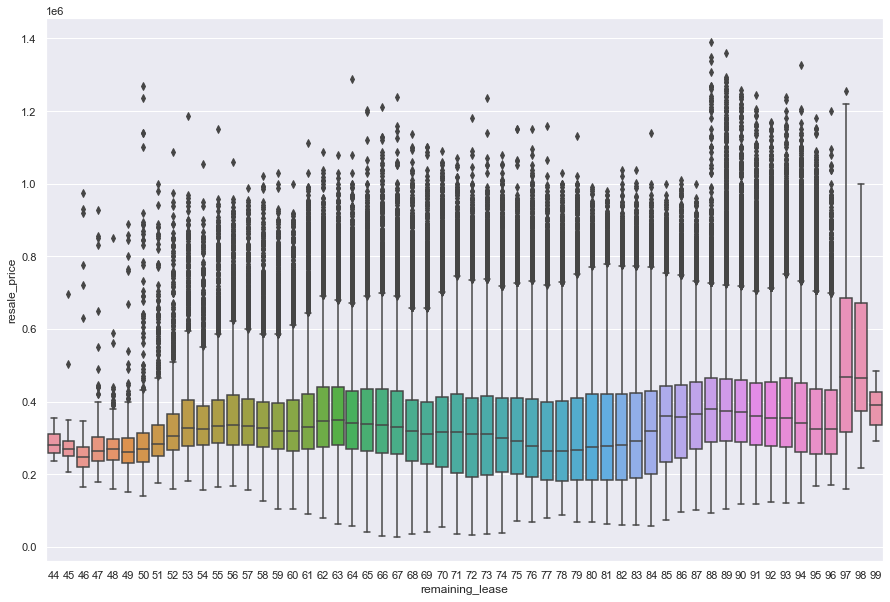

In [512]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x=df.remaining_lease, y=df.resale_price)
plt.show()

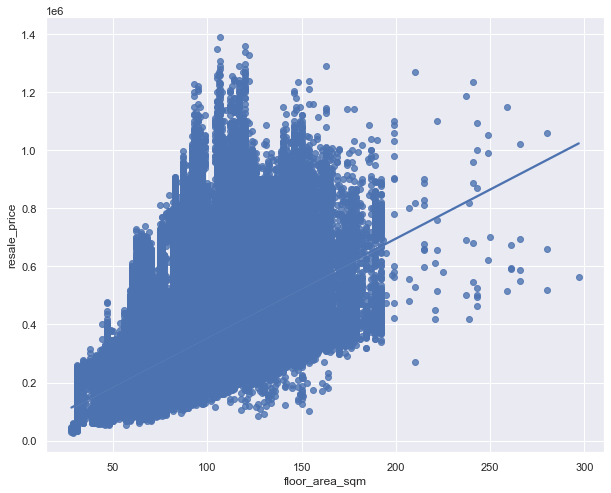

In [513]:
fig = plt.figure(figsize=(10, 8))
sns.regplot(data=df, x=df.floor_area_sqm, y=df.resale_price)
plt.show()

In general, HDB resale price increases from 2000 to 2022. The price is higher for HDB with more remaining lease and bigger floor square area.

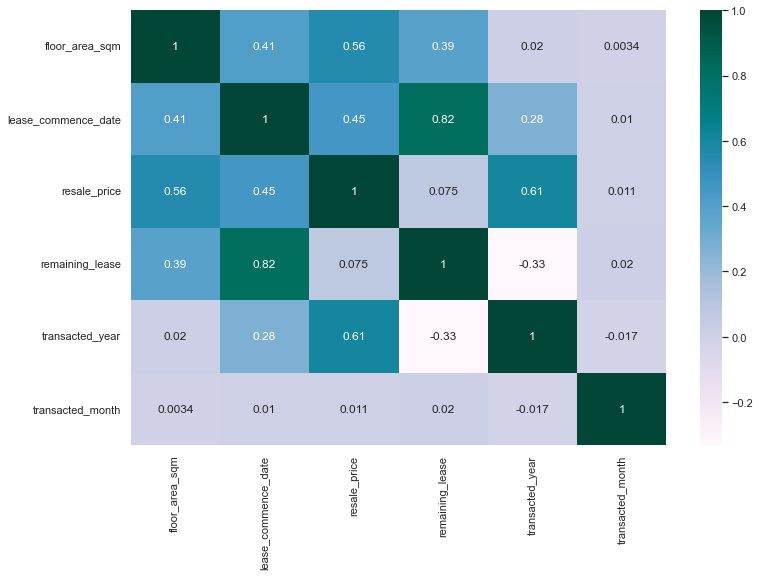

In [531]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(data=df.corr(), annot=True, cmap='PuBuGn')
plt.show()

It can be seen that resale price is correlated positively with floor area and remaining lease. Resale price has a higher correlation with floor area than remaining lease.

#### Plots of mean resale prices with each features

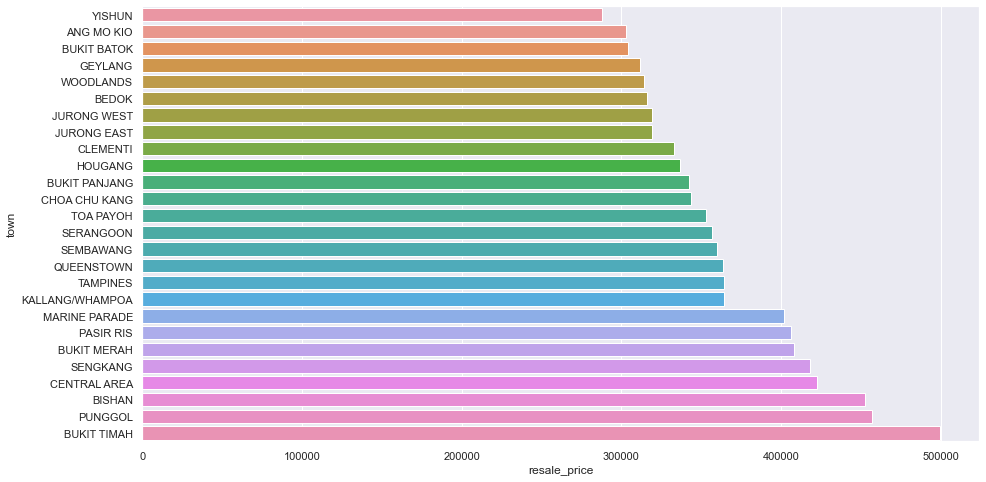

In [599]:
df_mean_by_town = df.groupby(['town']).mean().reset_index().sort_values('resale_price')
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=df_mean_by_town, x='resale_price', y='town')
plt.show()


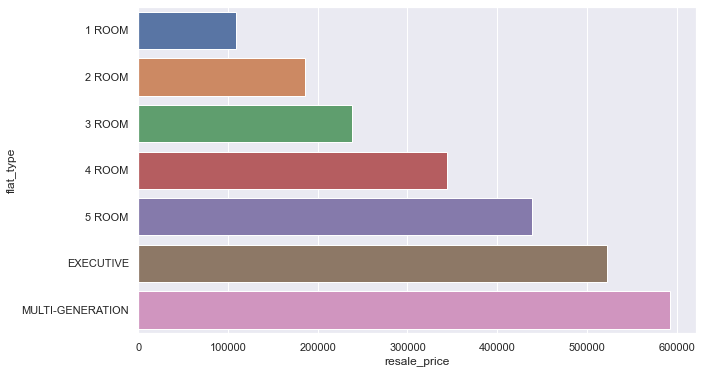

In [600]:
df_mean_by_flat_type = df.groupby(['flat_type']).mean().reset_index().sort_values('resale_price')
fig = plt.figure(figsize=(10, 6))
sns.barplot(data=df_mean_by_flat_type, x='resale_price', y='flat_type')
plt.show()

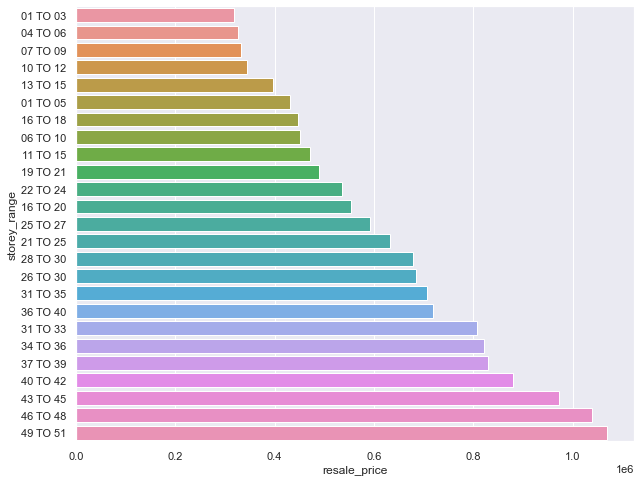

In [601]:
df_mean_by_storey_range = df.groupby(['storey_range']).mean().reset_index().sort_values('resale_price')
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=df_mean_by_storey_range, x='resale_price', y='storey_range')
plt.show()

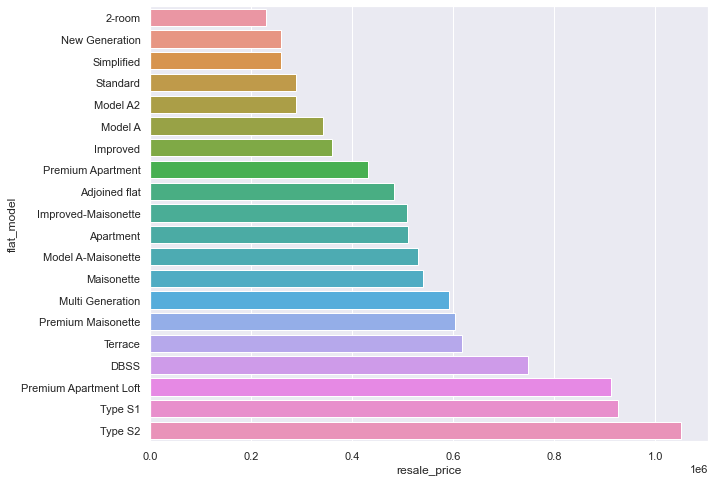

In [602]:
df_mean_by_flat_model = df.groupby(['flat_model']).mean().reset_index().sort_values('resale_price')
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=df_mean_by_flat_model, x='resale_price', y='flat_model')
plt.show()

Summary of findings
1. Model A and improved type HDB has the most transaction probably due to lower cost of ownership when compare to other flat type. 
2. Woodlands, Tampines and Jurong West are rank the top 3 for having most HDB transaction probably due to lower cost of ownership as well. 
3. 4 Room flat is more popular probably due to it's afforable pricing. 

## Geospatial visualization of resale HDB above 1million (Top 300)

In [583]:
df['address'] = df['block'] + ' ' + df['street_name']
df_1mil = df[df['resale_price'] >= 1e6].sort_values(by=['resale_price'], ascending=False)[:300].reset_index(drop=True)
df_1mil.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,transacted_year,transacted_month,address
0,CENTRAL AREA,5 ROOM,1F,CANTONMENT RD,46 TO 48,107.0,Type S2,2011,1388888.88,88,2022,3,1F CANTONMENT RD
1,BISHAN,5 ROOM,273B,BISHAN ST 24,37 TO 39,120.0,DBSS,2011,1360000.00,89,2021,12,273B BISHAN ST 24
2,CENTRAL AREA,5 ROOM,1E,CANTONMENT RD,46 TO 48,105.0,Type S2,2011,1348888.00,88,2022,3,1E CANTONMENT RD
3,BISHAN,5 ROOM,273A,BISHAN ST 24,34 TO 36,120.0,DBSS,2011,1338888.00,88,2022,1,273A BISHAN ST 24
4,QUEENSTOWN,5 ROOM,92,DAWSON RD,40 TO 42,122.0,Premium Apartment Loft,2016,1328000.00,94,2021,12,92 DAWSON RD


In [584]:
import requests
import json
from tqdm import tqdm

def latandlong(address):
    query_string = 'https://developers.onemap.sg/commonapi/search?searchVal='+str(address)+'&returnGeom=Y&getAddrDetails=Y&pageNum=1'
    resp = requests.get(query_string)
    data = json.loads(resp.content)
    if len(data['results']) > 0:
        return data['results'][0]['LATITUDE'], data['results'][0]['LONGITUDE']
    else:
        pass
    
address_list = list(df_1mil['address'])
coordinates_list = []
for address in tqdm(address_list):
    try:
        if len(latandlong(address)) > 0:
            coordinates_list.append(latandlong(address))
    except:
        coordinates_list.append(None)

100%|██████████| 300/300 [01:15<00:00,  4.00it/s]


In [585]:
df_latandlong = pd.DataFrame(coordinates_list, columns=['Latitude', 'Longitude'])
df_1mil = pd.concat([df_1mil, df_latandlong], axis=1)
df_1mil.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,transacted_year,transacted_month,address,Latitude,Longitude
0,CENTRAL AREA,5 ROOM,1F,CANTONMENT RD,46 TO 48,107.0,Type S2,2011,1388888.88,88,2022,3,1F CANTONMENT RD,1.27598699469414,103.841191762017
1,BISHAN,5 ROOM,273B,BISHAN ST 24,37 TO 39,120.0,DBSS,2011,1360000.00,89,2021,12,273B BISHAN ST 24,1.35607299328811,103.843470177697
2,CENTRAL AREA,5 ROOM,1E,CANTONMENT RD,46 TO 48,105.0,Type S2,2011,1348888.00,88,2022,3,1E CANTONMENT RD,1.27662168427368,103.841156142262
3,BISHAN,5 ROOM,273A,BISHAN ST 24,34 TO 36,120.0,DBSS,2011,1338888.00,88,2022,1,273A BISHAN ST 24,1.35636621091925,103.843933964667
4,QUEENSTOWN,5 ROOM,92,DAWSON RD,40 TO 42,122.0,Premium Apartment Loft,2016,1328000.00,94,2021,12,92 DAWSON RD,1.29512086158743,103.81115001607


In [597]:
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[1.3521, 103.8198], width='%100', height='%100', zoom_start=12)
locations = list(zip(df_1mil['Latitude'], df_1mil['Longitude']))
resale_price = list(df_1mil['resale_price'])
onemil_flat_model = list(df_1mil['flat_model'])
marker_cluster = MarkerCluster().add_to(map)

for i in range(len(locations)):
    lat_long  = locations[i]
    pop_model = 'Flat Model' + ': ' + str(onemil_flat_model[i])
    pop_price = '$' + str(resale_price[i])

    folium.Marker(location=lat_long, popup=(pop_model,pop_price), tooltip='Click to view flat model & price').add_to(marker_cluster)

map
